# 2. Vorhersage des Immobilienpreises (1/2)

Ziel dieser Teilaufgabe ist die Vorhersage des Preises (Attribut `PurchasePrice`).

Die Aufgabenstellung ist zwei Teilschritte gegliedert, die Verständnisgewinn und erfolgreiches Lösen der Aufgabenstellung unterstützen sollen:

# 2.1 Einfache lineare Regression und Residuenanalyse

Verwende ein einfaches lineares Modell zur Vorhersage von `price_cleaned` mit dem Attribut `Space extracted` oder `Floor_space_merged` (es gibt einige, wo beide fehlen (um die 800, können ignoriert werden).

Entwickle das Modell in einem Notebook. Untersuche dabei ob die Annahmen eines linearen Modells erfüllt sind mit geeigneten Darstellungen. Wie können Variablen-Transformationen verwendet werden, um die Modellvoraussetzungen besser zu erfüllen und das Modell zu verbessern?

Rapportiere und diskutiere die erreichte Genauigkeit der Vorhersage mit mehreren sinnvollen Metriken und auf unabhängigen Testdaten.

Abgabe

Notebook und daraus erstellter Bericht (ohne Code) als pdf.

In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Import sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load dataframm clean
#df = pd.read_csv('../data/clean_gde.csv', usecols=["living_space", "floor_space", "price"])

# load raw dataframe 
df = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/immoscout_cleaned_lat_lon_fixed_v9.csv", usecols = ["Floor_space_merged", "Space extracted", "price_cleaned"])

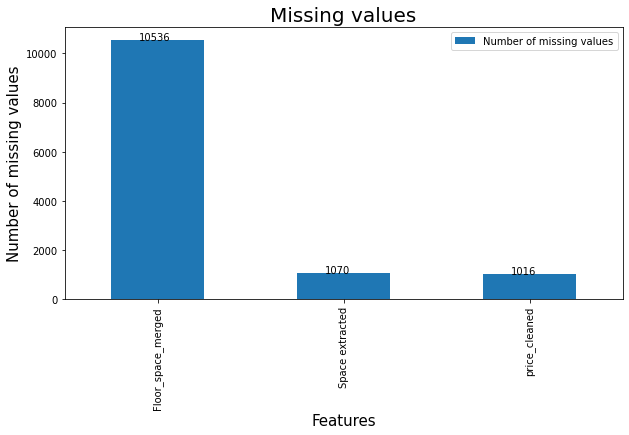

(13378, 3)

In [2]:
# Visualize missing values with barplot and number of missing value on top of each bar
def missing_values_barplot(df):
    """
    Visualize missing values with barplot and number of missing value on top of each bar
    Args:
        df (DataFrame): DataFrame with missing values
    """
    # Calculate number of missing values
    missing_values = df.isnull().sum().sort_values(ascending=False)
    # Concatenate number of missing values and percentage of missing values
    missing_values = pd.concat([missing_values], axis=1, keys=['Number of missing values'])
    # Plot barplot
    missing_values.plot(kind='bar', figsize=(10, 5))
    # Add number of missing values on top of each bar
    for i in range(len(missing_values)):
        plt.text(x = i-0.1 , y = missing_values['Number of missing values'][i], s = missing_values['Number of missing values'][i], size = 10)
    # Set title
    plt.title('Missing values', fontsize=20)
    # Set x-label
    plt.xlabel('Features', fontsize=15)
    # Set y-label
    plt.ylabel('Number of missing values', fontsize=15)
    # Display plot
    plt.show()

# Visualize missing values with barplot and number of missing value on top of each bar
missing_values_barplot(df)

# shape of dataframe
df.shape

We are selecting space_extracted as feature and price_cleaned as target. 
Floor_space_merged wont be used for the linear regression modell, beceause there are over 10000 missing values out
from 13378 observations.

# Simple Linear Regression with price_cleaned vs. Space extracted

Coefficient:  7968.648079461647
Intercept:  -48645.67333018803
R2 score:  0.4111248968344836


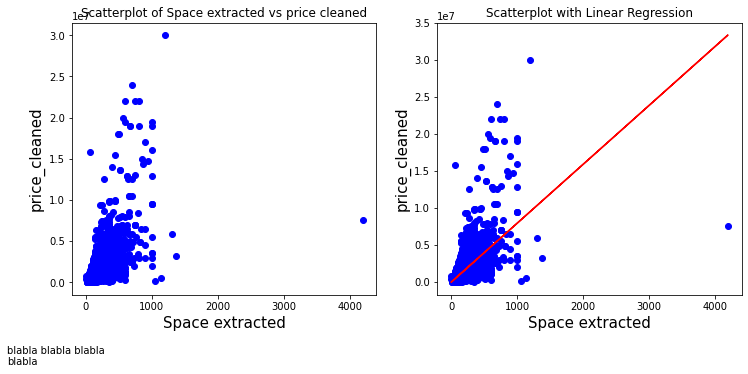

In [3]:
# Select interested cols
df_living_space_price = df[['Space extracted', 'price_cleaned']]

# drop missing rows
df_living_space_price = df_living_space_price.dropna()

# create x and y variabels for regression
x = df_living_space_price['Space extracted'].values.reshape(-1, 1)
y = df_living_space_price['price_cleaned'].values.reshape(-1, 1)

# creating sklearn Linear Regression model
model_1 = LinearRegression().fit(x, y)

# get the coefficient and intercept
print('Coefficient: ', model_1.coef_[0][0])
print('Intercept: ', model_1.intercept_[0])

# get the R2 score
print('R2 score: ', model_1.score(x, y))

# Visualize scatterplot with fig and 2 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x, y, color='blue')
ax[0].set_title('Scatterplot of Space extracted vs price cleaned')
ax[0].set_xlabel('Space extracted', fontsize = 15)
ax[0].set_ylabel('price_cleaned', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x, y, color='blue')
ax[1].plot(x, model_1.predict(x), color='red')
ax[1].set_title('Scatterplot with Linear Regression')
ax[1].set_xlabel('Space extracted', fontsize=15)
ax[1].set_ylabel('price_cleaned', fontsize=15)
fig.text(0.05, -0.07, "blabla blabla blabla \nblabla")
plt.show()

## Model_1
${price = 7969 * Space extracted +  -48645}$

gets us an R2 Score of:  0.4111

## Residuenanalyse

For the residueanalyse we are checking three conditions:
- The error shouldn’t be dependent
- The expected value should be around 0
- The residuals should follow normal distribution

C:\Users\Si Ben Tran\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


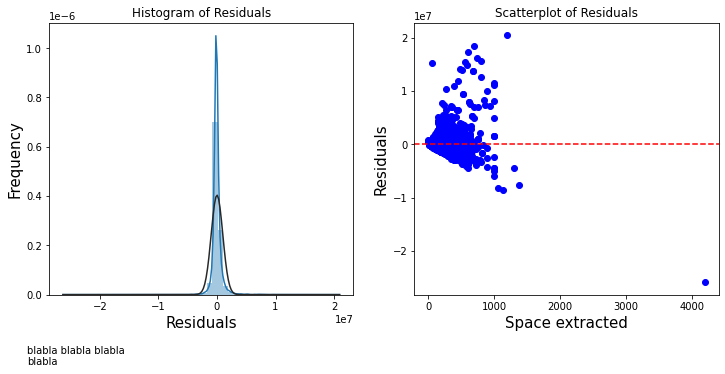

In [4]:
# calculte Residuals
residuals = y - model_1.predict(x)

# Visualize Residuals with fig and 2
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Plot histogram of residuals
sns.distplot(residuals, fit=norm, ax=ax[0])
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)

ax[1].scatter(x, residuals, color='blue')
# draw horizontal line at y=0
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_title('Scatterplot of Residuals')
ax[1].set_xlabel('Space extracted', fontsize=15)
ax[1].set_ylabel('Residuals', fontsize=15)
fig.text(0.1, -0.07, "blabla blabla blabla \nblabla")
plt.show()

The resiudals are not independent. The values arent around 0.

## Conclusion from model_1

Model_1 has an R^2 from 0.4111. But unfortunatly the residuals are note independent and therefore we need to transform ether the x-axis or the y-axis. 



# Simple Lineare Regression with logarithmic transformation

Coefficient of model_2:  1465069.8738076377
Coefficient of model_3:  0.004112884145151905
Coefficient of model_4:  0.9971487616828036
Intercept of model_2:  -5995755.044983196
Intercept of model_3:  13.065102392502155
Intercept of model_4:  8.817517686162077
R2 score of model_2:  0.3311008909200499
R2 score of model_3:  0.3407929817565647
R2 score of model_4:  0.4772619256643995


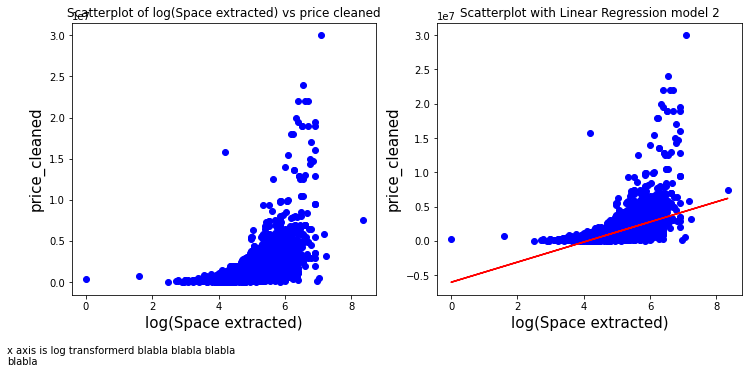

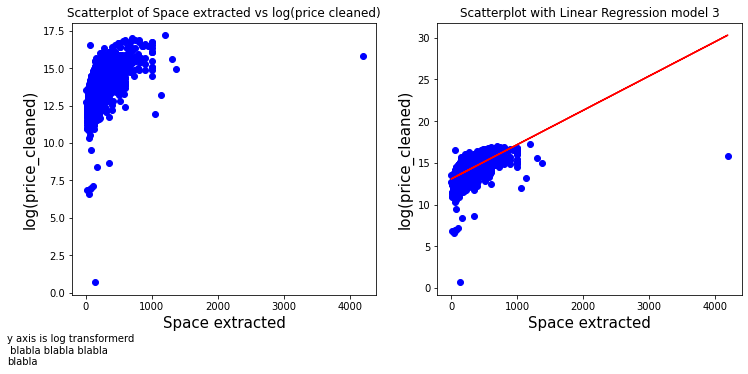

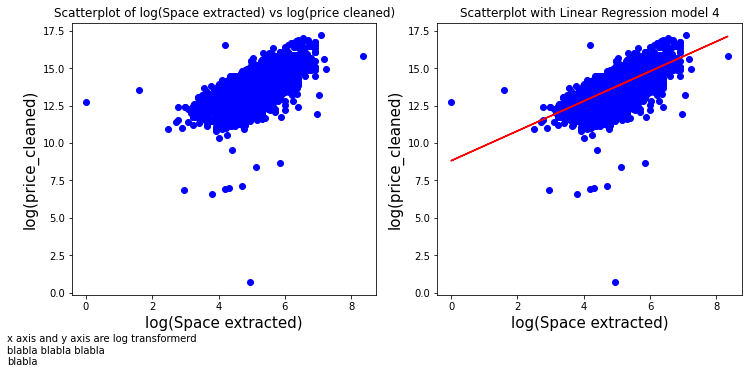

In [5]:
# Select interested cols
df_living_space_price = df[['Space extracted', 'price_cleaned']]
# drop missing rows
df_living_space_price = df_living_space_price.dropna()

# create x and y variabels for regression
x = df_living_space_price['Space extracted'].values.reshape(-1, 1)
y = df_living_space_price['price_cleaned'].values.reshape(-1, 1)
# Logarithmic transformation of x and y
x_log = np.log(x)
y_log = np.log(y)

# creating sklearn Linear Regression model
model_2 = LinearRegression().fit(x_log, y)
model_3 = LinearRegression().fit(x, y_log)
model_4 = LinearRegression().fit(x_log, y_log)

# get the coefficient and intercept
print('Coefficient of model_2: ', model_2.coef_[0][0])
print('Coefficient of model_3: ', model_3.coef_[0][0])
print('Coefficient of model_4: ', model_4.coef_[0][0])
print('Intercept of model_2: ', model_2.intercept_[0])
print('Intercept of model_3: ', model_3.intercept_[0])
print('Intercept of model_4: ', model_4.intercept_[0])
# get the R2 score
print('R2 score of model_2: ', model_2.score(x_log, y))
print('R2 score of model_3: ', model_3.score(x, y_log))
print('R2 score of model_4: ', model_4.score(x_log, y_log))

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x_log, y, color='blue')
ax[0].set_title('Scatterplot of log(Space extracted) vs price cleaned')
ax[0].set_xlabel('log(Space extracted)', fontsize = 15)
ax[0].set_ylabel('price_cleaned', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x_log, y, color='blue')
ax[1].plot(x_log, model_2.predict(x_log), color='red')
ax[1].set_title('Scatterplot with Linear Regression model 2')
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('price_cleaned', fontsize=15)
fig.text(0.05, -0.07, "x axis is log transformerd blabla blabla blabla \nblabla")
plt.show()

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x, y_log, color='blue')
ax[0].set_title('Scatterplot of Space extracted vs log(price cleaned)')
ax[0].set_xlabel('Space extracted', fontsize = 15)
ax[0].set_ylabel('log(price_cleaned)', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x, y_log, color='blue')
ax[1].plot(x, model_3.predict(x), color='red')
ax[1].set_title('Scatterplot with Linear Regression model 3')
ax[1].set_xlabel('Space extracted', fontsize=15)
ax[1].set_ylabel('log(price_cleaned)', fontsize=15)
fig.text(0.05, -0.07, "y axis is log transformerd \n blabla blabla blabla \nblabla")
plt.show()

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x_log, y_log, color='blue')
ax[0].set_title('Scatterplot of log(Space extracted) vs log(price cleaned)')
ax[0].set_xlabel('log(Space extracted)', fontsize = 15)
ax[0].set_ylabel('log(price_cleaned)', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x_log, y_log, color='blue')
ax[1].plot(x_log, model_4.predict(x_log), color='red')
ax[1].set_title('Scatterplot with Linear Regression model 4')
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('log(price_cleaned)', fontsize=15)
fig.text(0.05, -0.07, "x axis and y axis are log transformerd \nblabla blabla blabla \nblabla")
plt.show()


## Residualanalysis for the log model 4

C:\Users\Si Ben Tran\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


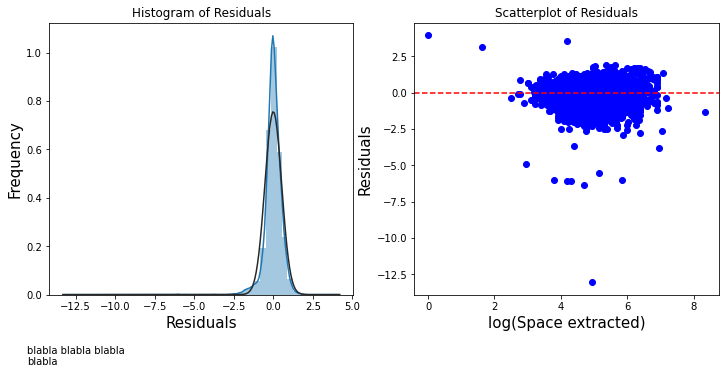

In [6]:
# calculte Residuals
residuals = y_log - model_4.predict(x_log)

# Visualize Residuals with fig and 2
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Plot histogram of residuals
sns.distplot(residuals, fit=norm, ax=ax[0])
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)

ax[1].scatter(x_log, residuals, color='blue')
# draw horizontal line at y=0
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_title('Scatterplot of Residuals')
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('Residuals', fontsize=15)
fig.text(0.1, -0.07, "blabla blabla blabla \nblabla")
plt.show()

## Conclusion of log transformation

The log transformation for the x axis (space extracted) and y axis (price_cleaned) increased our model R^2 from the previous model 1: 0.4111 to our actual best model 4: 0.477
The residuals of model 4 are norm distributed and has an expected mean value of 0, also are the residuals independent.

So to improve our Model we will remove the outliers. 

# Simple Linear Regression with removed outliers

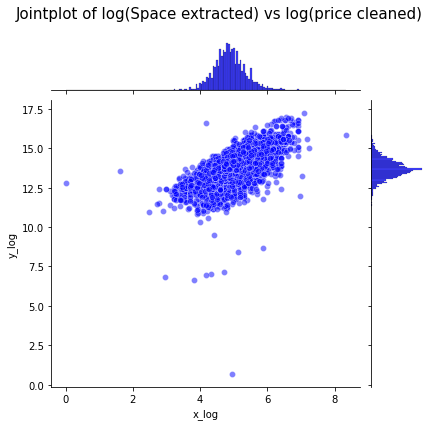

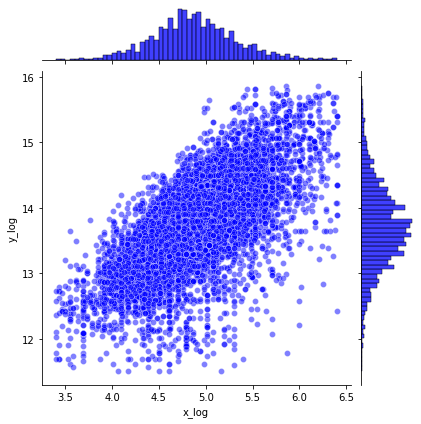

In [7]:
# create x_log and y_log dataframe
df_log_outliers = pd.DataFrame({'x_log': x_log.flatten(), 'y_log': y_log.flatten()})

# create jointplot
sns.jointplot(x='x_log', y='y_log', data=df_log_outliers, color='blue', alpha = 0.5)
plt.subplots_adjust(top=0.9)
plt.suptitle('Jointplot of log(Space extracted) vs log(price cleaned)', fontsize=15)
plt.xlabel('log(Space extracted)', fontsize=15)
plt.ylabel('log(price_cleaned)', fontsize=15)
plt.show() 

# remove every outlier with zscore > 3
from scipy import stats
df_log = df_log_outliers[(np.abs(stats.zscore(df_log_outliers)) < 3).all(axis=1)]

# create jointplot
sns.jointplot(x='x_log', y='y_log', data=df_log, color='blue', alpha = 0.5)
plt.show()


Coefficient:  0.9594405596743059
Intercept:  9.009523705829181
R2 score:  0.4842466493610095


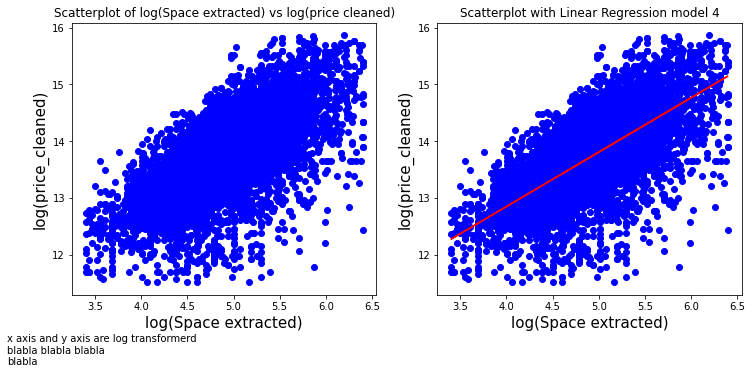

In [8]:
# create x_log and y_log 
x_log_3 = df_log['x_log'].values.reshape(-1, 1)
y_log_3 = df_log['y_log'].values.reshape(-1, 1)

# creating sklearn Linear Regression model
model_5 = LinearRegression().fit(x_log_3, y_log_3)

# get the coefficient and intercept
print('Coefficient: ', model_5.coef_[0][0])
print('Intercept: ', model_5.intercept_[0])

# get the R2 score
print('R2 score: ', model_5.score(x_log_3, y_log_3))

# Visualize scatterplot with fig and ax
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x_log_3, y_log_3, color='blue')
ax[0].set_title('Scatterplot of log(Space extracted) vs log(price cleaned)')
ax[0].set_xlabel('log(Space extracted)', fontsize = 15)
ax[0].set_ylabel('log(price_cleaned)', fontsize = 15)
# Plot scatterplot with model
ax[1].scatter(x_log_3, y_log_3, color='blue')
ax[1].plot(x_log_3, model_5.predict(x_log_3), color='red')
ax[1].set_title('Scatterplot with Linear Regression model 4')
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('log(price_cleaned)', fontsize=15)
fig.text(0.05, -0.07, "x axis and y axis are log transformerd \nblabla blabla blabla \nblabla")
plt.show()


## Residual Analysis of model 5

C:\Users\Si Ben Tran\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


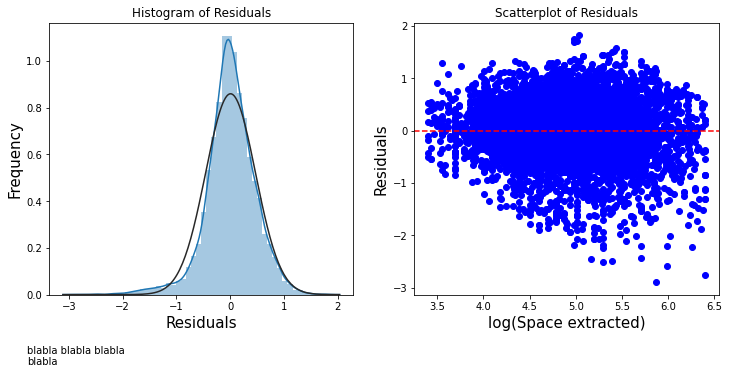

In [10]:
# calculte Residuals
residuals = y_log_3 - model_4.predict(x_log_3)

# Visualize Residuals with fig and 2
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Plot histogram of residuals
sns.distplot(residuals, fit=norm, ax=ax[0])
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals', fontsize=15)
ax[0].set_ylabel('Frequency', fontsize=15)

ax[1].scatter(x_log_3, residuals, color='blue')
# draw horizontal line at y=0
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_title('Scatterplot of Residuals')
ax[1].set_xlabel('log(Space extracted)', fontsize=15)
ax[1].set_ylabel('Residuals', fontsize=15)
fig.text(0.1, -0.07, "blabla blabla blabla \nblabla")
plt.show()

## Conclusion of remove outliers

The model improved a little bit, when the outliers zscore >= 3 are removed. 
The R^2 goes from 0.47 to 0.48. 

The residual analysis are also good.

# Model Summary

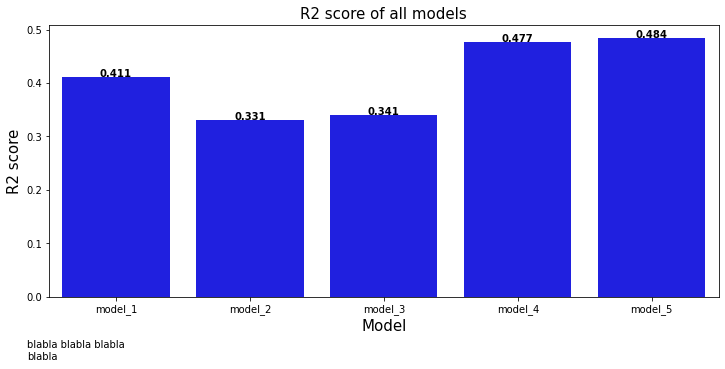

In [48]:
# Create empty Dictionary to store model as value and key for parameters
model_dict = {}

model_dict["model_1"] = {'intercept': model_1.intercept_[0], 'coefficient': model_1.coef_[0][0], 'R2': model_1.score(x, y)}
model_dict["model_2"] = {'intercept': model_2.intercept_[0], 'coefficient': model_2.coef_[0][0], 'R2': model_2.score(x_log, y)}
model_dict["model_3"] = {'intercept': model_3.intercept_[0], 'coefficient': model_3.coef_[0][0], 'R2': model_3.score(x, y_log)}
model_dict["model_4"] = {'intercept': model_4.intercept_[0], 'coefficient': model_4.coef_[0][0], 'R2': model_4.score(x_log, y_log)}
model_dict["model_5"] = {'intercept': model_5.intercept_[0], 'coefficient': model_5.coef_[0][0], 'R2': model_5.score(x_log_3, y_log_3)}

# create dataframe from model_dict and remove index
df_model = pd.DataFrame(model_dict).T.reset_index()

# Visualize R2 score with barplot sort R^2 add number on top of bar
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='index', y='R2', data=df_model, ax=ax, color='blue')
ax.set_title('R2 score of all models', fontsize = 15)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('R2 score', fontsize=15)
for i, v in enumerate(df_model['R2']):
    ax.text(i, v, str(round(v, 3)), color='black', fontweight='bold', ha='center')
fig.text(0.1, -0.05, "blabla blabla blabla \nblabla")
plt.show()


Model 5 has the highest score R^2 of 0.484 
Consider that we are only allowed to use one feature it is okay. 
Therefore with the multiple lineare regression model, we should get a higher R^2 score.